In [1]:
import os
import torch
import torchvision
import tarfile
import jovian
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df[train_df['Sex'].str.match("male")].Sex.count() 

577

In [6]:
train_df[train_df['Sex'].str.match("female")].Sex.count()

314

Text(0.5, 1.0, 'How many Men and Women in train_df')

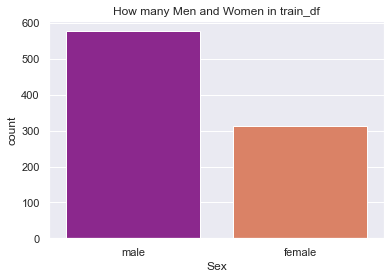

In [7]:
sns.set(font_scale=1)
sns.countplot(x='Sex',data=train_df,palette='plasma').set_title('How many Men and Women in train_df')

In [8]:
#Here 0 = Not Survived & 1 = Survived #
train_df['Survived'].value_counts() *100/len(train_df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [9]:
tm = train_df.groupby("Survived").mean()
tm
v1 = tm.iloc[0,:]
v2 = tm.iloc[1,:]
abs((v2-v1)/(v1+v2))

PassengerId    0.002971
Pclass         0.129755
Age            0.038706
SibSp          0.077914
Parch          0.170176
Fare           0.372661
dtype: float64

In [10]:
train_df = train_df.drop(["PassengerId","Name","Ticket"], axis=1)

In [11]:
 def missingtraindata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(6,4))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="blue",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

C:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


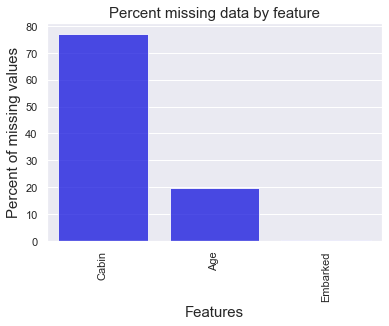

In [12]:
missingtraindata(train_df)

In [13]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
def missingtestdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(6,4))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

C:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


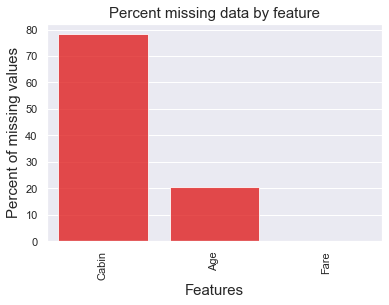

In [15]:
missingtestdata(test_df)

In [16]:
train_df["Cabin"] = train_df["Cabin"].isna()
train_df = pd.get_dummies(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    bool   
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(5)
memory usage: 47.1 KB


In [17]:
train_df["Age"][train_df["Age"].isna()] = train_df["Age"].mean()
train_df.count()

C:\Users\dasha\AppData\Local\Temp\ipykernel_1604\1556003216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Age"][train_df["Age"].isna()] = train_df["Age"].mean()


Survived      891
Pclass        891
Age           891
SibSp         891
Parch         891
Fare          891
Cabin         891
Sex_female    891
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

In [18]:
test_df['Age'].mean()

30.272590361445783

In [19]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [20]:
test_df["Cabin"] = test_df["Cabin"].isna()
test_df = pd.get_dummies(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 793 entries, PassengerId to Embarked_S
dtypes: bool(1), float64(2), int64(4), uint8(786)
memory usage: 341.0 KB


In [21]:
test_df.isnull().sum()

PassengerId           0
Pclass                0
Age                   0
SibSp                 0
Parch                 0
                     ..
Ticket_W./C. 6608     0
Ticket_W.E.P. 5734    0
Embarked_C            0
Embarked_Q            0
Embarked_S            0
Length: 793, dtype: int64

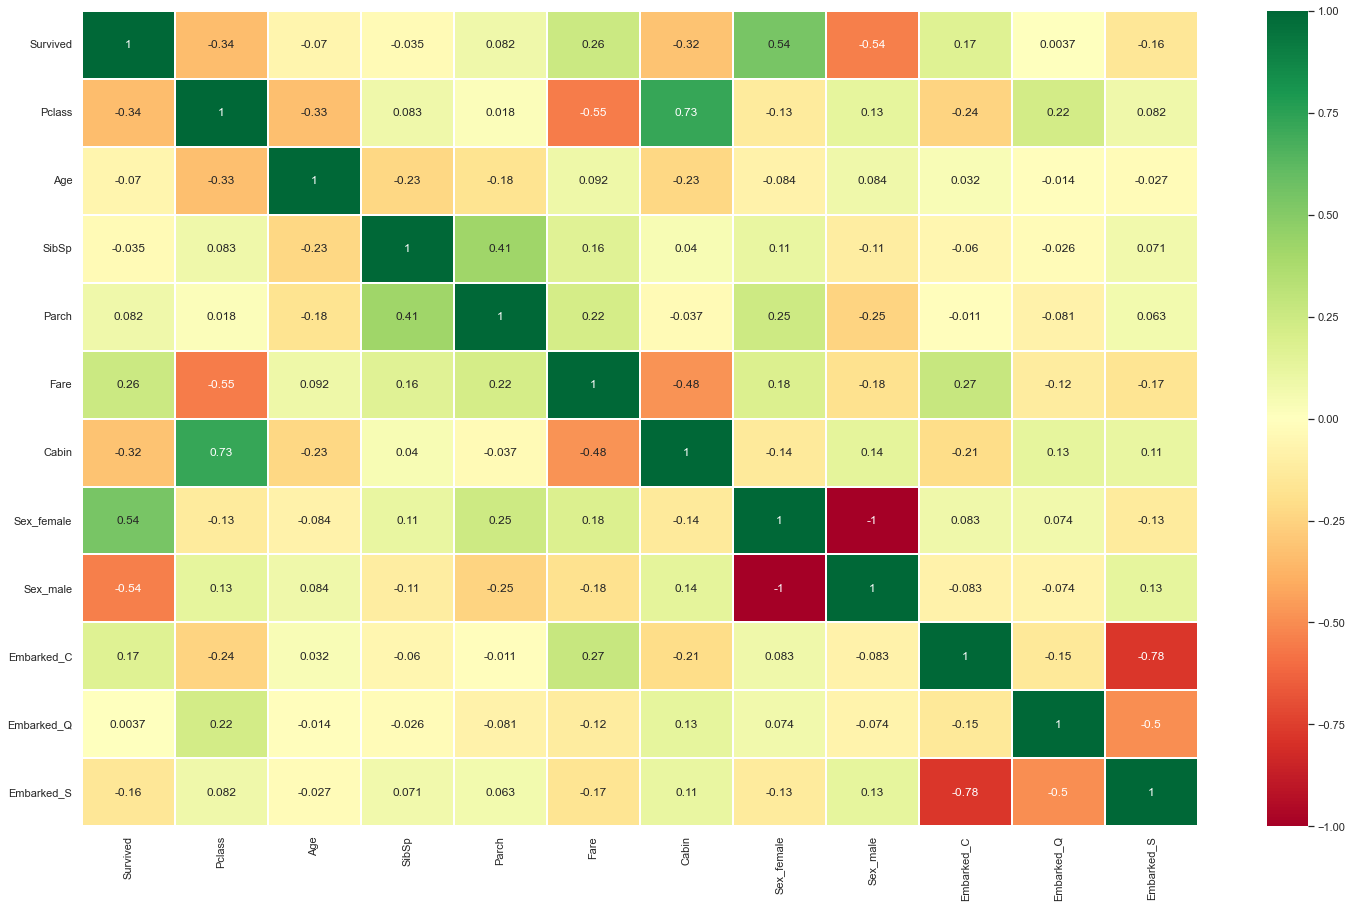

In [22]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

In [23]:
#import logistic regression
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
#import xgboost for test purpose (Not Required)
from xgboost import XGBClassifier
import numpy as np

In [24]:
all_features = train_df.drop("Survived",axis=1)
Targeted_feature = train_df["Survived"]

In [25]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(all_features,Targeted_feature, test_size = 0.2,random_state = 10)

In [26]:
# Model Preprocessing.
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']
X_train.shape, y_train.shape, X_test.shape

((891, 11), (891,), (179, 11))

In [27]:
# Initialize our algorithm
# logmodel = XGBClassifier()
logmodel = LogisticRegression()

In [28]:
logmodel.fit(X_train,y_train)

C:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.8435754189944135
Survived 58
NOT Survived 121


array([[105,  12],
       [ 16,  46]], dtype=int64)

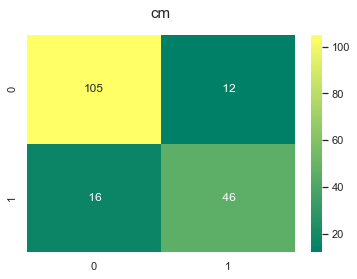

In [30]:
cm = confusion_matrix(y_test,pp)
#visualize confusion matrix 
sns.heatmap(confusion_matrix(y_test,pp),annot=True,fmt='3.0f',cmap="summer")
plt.title('cm', y=1.05, size=15)
cm

In [31]:
prediction_lr=logmodel.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 84.36


In [32]:
 result_lr=cross_val_score(logmodel,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

C:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

The cross validated score for Logistic Regression is: 79.12


C:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dasha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [33]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_test})
submission['Survived'] = submission['Survived'].fillna(0)
submission['PassengerId'] = submission['PassengerId'].fillna(0)
submission

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0
...,...,...
851,0.0,0.0
861,0.0,0.0
870,0.0,0.0
876,0.0,0.0


In [34]:
submission.to_csv('titanic_submission1.csv',index=False)